Exercicio 2 PCS5024, Mais algoritmos para a base adult kaggle

In [1]:
import FuncoesAuxiliares as fa
import FuncoesDeMachineLearning as fml
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
datasetPath = f"Kaggle\\adult.csv"
datasetDataFrame = fa.getDataframeInSpecificFormat(datasetPath)

Descricao das colunas discretas da base 

In [3]:
describedDataFrame = pd.DataFrame(columns = None)
for column in datasetDataFrame.columns:
    if (datasetDataFrame[column].dtype == 'object'):
        describedDataFrame[column] = datasetDataFrame[column].describe(include=['category'])
describedDataFrame

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [4]:
datasetDataFrame['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Transforma classes binarias em variaveis binarias

In [5]:
outputName = 'income'
datasetDataFrameReducedColumns = datasetDataFrame.copy() 
datasetDataFrameReducedColumns[outputName] =  datasetDataFrame["income"].map({"<=50K":0, ">50K":1})
datasetDataFrameReducedColumns['sex'] =  datasetDataFrame["sex"].map({"Male":1, "Female":0})
# Coluna casado ou não
datasetDataFrameReducedColumns["marital.status"] = datasetDataFrameReducedColumns["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
datasetDataFrameReducedColumns["marital.status"] = datasetDataFrameReducedColumns["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married')
datasetDataFrameReducedColumns["marital.status"] = datasetDataFrameReducedColumns["marital.status"].map({"Married":1, "Single":0})
# dropa a coluna de education como int
datasetDataFrameReducedColumns.drop(['education.num'],axis = 1,inplace=True)

Porcentagem de nulos em cada uma das colunas

In [6]:
dicOfMissingValues = {}
sizeOfData = len(datasetDataFrameReducedColumns.index)
for column in datasetDataFrameReducedColumns.columns:
    dicOfMissingValues[column] = list(datasetDataFrame[column]).count("?")*100/sizeOfData
print("Porcentagem de '?' em cada coluna ")
for key,val in  dicOfMissingValues.items(): 
    print('{key} - {val:.2f}%'.format(key = key, val = val))

Porcentagem de '?' em cada coluna 
age - 0.00%
workclass - 5.64%
fnlwgt - 0.00%
education - 0.00%
marital.status - 0.00%
occupation - 5.66%
relationship - 0.00%
race - 0.00%
sex - 0.00%
capital.gain - 0.00%
capital.loss - 0.00%
hours.per.week - 0.00%
native.country - 1.79%
income - 0.00%


Remove as linhas que possuem valores nulos

In [7]:
datasetDataFrameWithoutColumnsWithMissingValues = fa.removeLinesWithMissingValues(datasetDataFrameReducedColumns)
print(f"Numero total de linhas = {len(datasetDataFrameReducedColumns.index)}")
print(f"Numero total de linhas que não possuem valores nulos = {len(datasetDataFrameWithoutColumnsWithMissingValues.index)}")
print("Porcentagem de linhas perdidas = ")
print(f"{(1 - len(datasetDataFrameWithoutColumnsWithMissingValues.index)/len(datasetDataFrameReducedColumns.index))*100:.2f}%")

Numero total de linhas = 32561
Numero total de linhas que não possuem valores nulos = 30162
Porcentagem de linhas perdidas = 
7.37%


In [8]:
describedDataFrame = pd.DataFrame(columns = None)
for column in datasetDataFrameWithoutColumnsWithMissingValues.columns:
    if (datasetDataFrameWithoutColumnsWithMissingValues[column].dtype != 'object'):
        describedDataFrame[column] = datasetDataFrameWithoutColumnsWithMissingValues[column].describe(include=['category'])
describedDataFrame

,age,fnlwgt,marital.status,sex,capital.gain,capital.loss,hours.per.week,income
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,0.479279,0.675685,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,0.499579,0.468126,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,1.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,1.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [9]:
datasetDataFrameWithoutColumnsWithMissingValues['relationship'].value_counts()

Husband           12463
Not-in-family      7726
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: relationship, dtype: int64

Mostra imagem de correlação

In [10]:
dummiesDataFrame = pd.get_dummies(datasetDataFrameWithoutColumnsWithMissingValues)
cor = dummiesDataFrame.corr()
cor_target = abs(cor[outputName]).sort_values(ascending=False)[1:]
cor_target

marital.status            0.436142
relationship_Husband      0.401236
age                       0.241998
hours.per.week            0.229480
relationship_Own-child    0.226186
                            ...   
native.country_Cuba       0.002919
native.country_Ireland    0.002649
education_Assoc-acdm      0.002170
native.country_Greece     0.001933
native.country_Hungary    0.000872
Name: income, Length: 96, dtype: float64

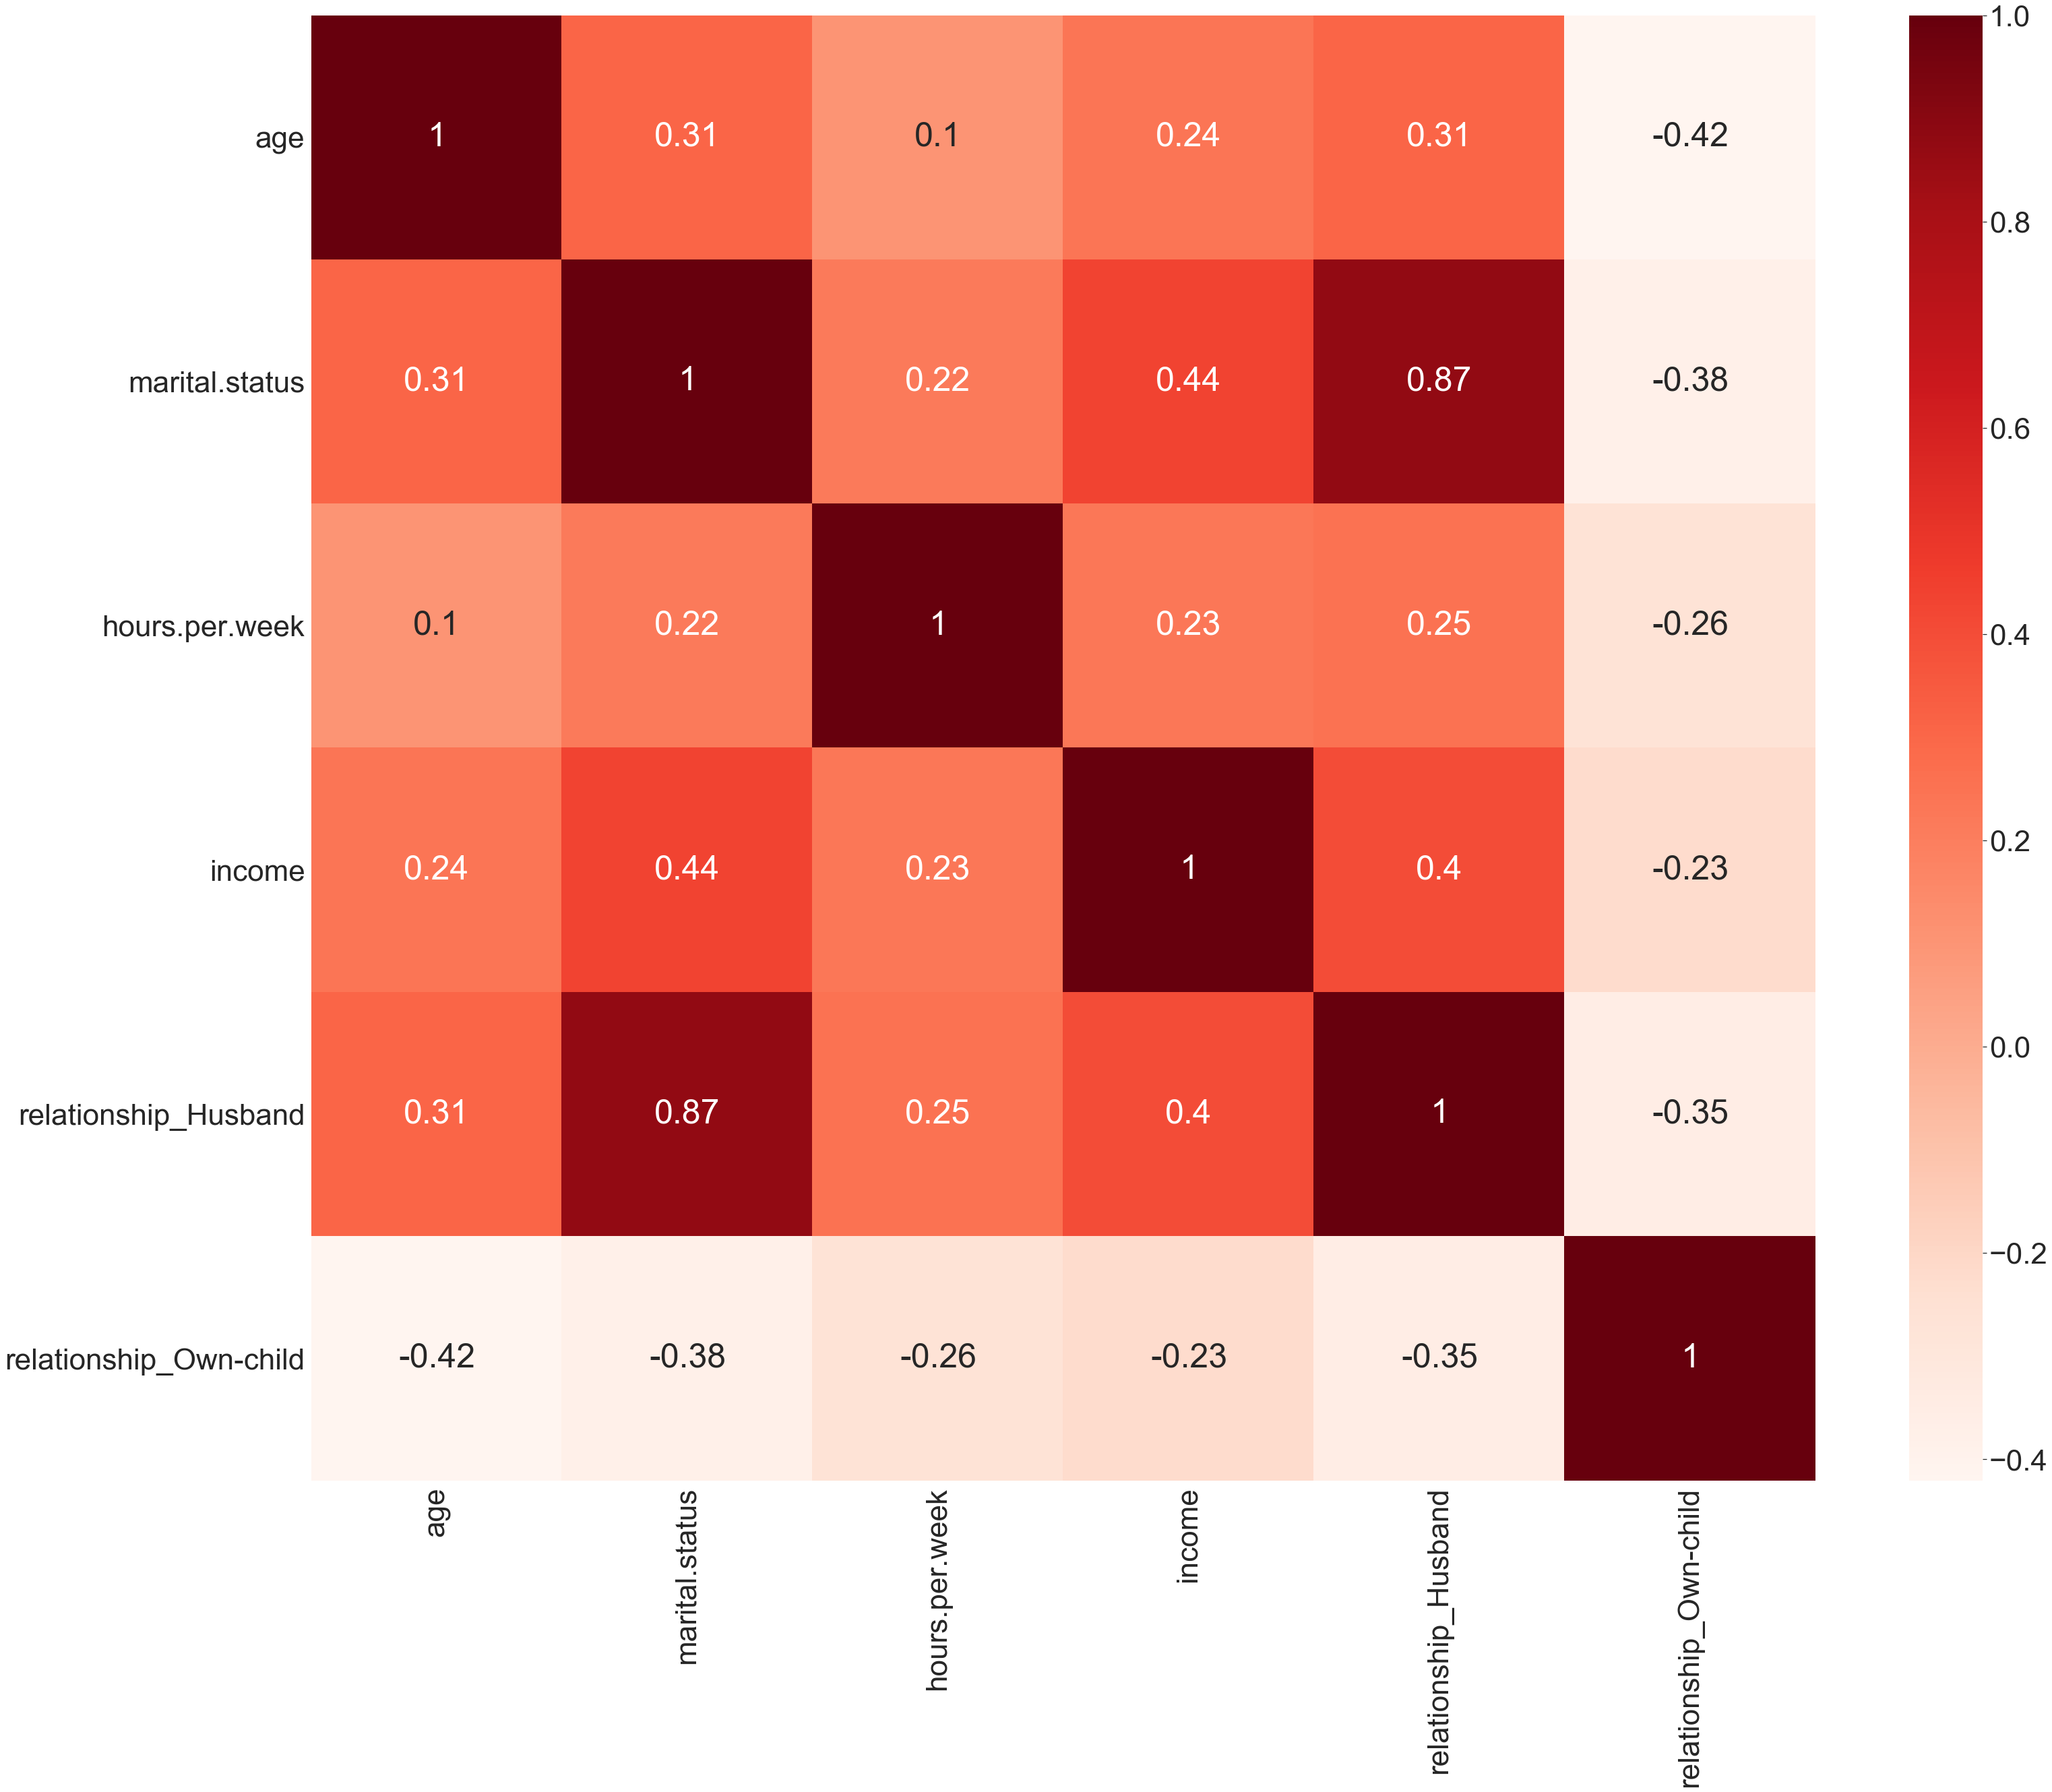

In [11]:
numberOfRelevantVariables = 5
columnsNamesToBeRemoved = list(cor_target.keys()[numberOfRelevantVariables:])
correlatedDataFrame = dummiesDataFrame.drop(columns = columnsNamesToBeRemoved)
plt.figure(figsize=(50,40))
cor = correlatedDataFrame.corr()
sns.set(font_scale=4)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, annot_kws={"size": 50})

Create training validaditon and test sets

In [26]:
numberOfRelevantVariables = 20
X_train,X_crossVal, X_test,y_train,y_crossVal, y_test = fa.prepareDatasetforTraining(datasetDataFrameWithoutColumnsWithMissingValues,outputName,numberOfRelevantVariables)

Cross Validating algorithms

In [27]:
#KNN algorithm
knnPerformanceDataFrame = fml.applyKNNWithDifferentHyperparameters(X_train, X_crossVal, y_train, y_crossVal,numberOfRelevantVariables)
knnPerformanceDataFrame.to_excel('knnPeformance.xlsx')
knnPerformanceDataFrame

,number of neighbors,number of relevant variables,accuracy,precision,recall,f1-score
0,10,20,0.829604,0.718438,0.524188,0.606130
1,20,20,0.835074,0.726232,0.546720,0.623819
2,30,20,0.832422,0.724324,0.532803,0.613975
3,50,20,0.834079,0.736059,0.524851,0.612766
4,60,20,0.834079,0.736940,0.523526,0.612166
5,70,20,0.831261,0.726685,0.521537,0.607253
6,80,20,0.828609,0.721342,0.512922,0.599535
7,90,20,0.829604,0.722068,0.518224,0.603395
8,100,20,0.828941,0.718207,0.520212,0.603382


In [28]:
#Naieve bayes
naiveBayesPerfomanceDataFrame = fml.applyNaiveBayesWithDifferentHyperparameters(X_train, X_crossVal, y_train, y_crossVal,numberOfRelevantVariables)
naiveBayesPerfomanceDataFrame.to_excel('NBPeformance.xlsx')
naiveBayesPerfomanceDataFrame

,method optimization,number of relevant variables,accuracy,precision,recall,f1-score
0,gaussian,20,0.820985,0.641397,0.644798,0.643093
1,multinominal,20,0.831759,0.696656,0.579854,0.632911
2,bernouli,20,0.741091,0.489413,0.811796,0.610668


In [29]:
#Logistic Regression
logisticRegressionPerformanceDataFrame = fml.applyLogisticRegressionDifferentHyperparameters(X_train, X_crossVal, y_train, y_crossVal,numberOfRelevantVariables)
logisticRegressionPerformanceDataFrame.to_excel('LRPeformance.xlsx')
logisticRegressionPerformanceDataFrame

,C,number of relevant variables,accuracy,precision,recall,f1-score
0,0.03125,20,0.830101,0.736328,0.499669,0.595341
1,0.06250,20,0.830267,0.737978,0.498343,0.594937
2,0.12500,20,0.832753,0.742248,0.507621,0.602912
3,0.25000,20,0.835903,0.747851,0.518887,0.612676
4,0.50000,20,0.838886,0.754021,0.528164,0.621200
5,1.00000,20,0.842201,0.757156,0.543406,0.632716
6,2.00000,20,0.842201,0.754803,0.546720,0.634128
7,4.00000,20,0.843693,0.757273,0.552021,0.638559
8,8.00000,20,0.844025,0.758182,0.552684,0.639325
9,16.00000,20,0.844190,0.757933,0.554009,0.640123


In [30]:
#Decision Tree
decisionTreePerformanceDataFrame = fml.applyDecisionTreeDifferentHyperparameters(X_train, X_crossVal, y_train, y_crossVal,numberOfRelevantVariables)
decisionTreePerformanceDataFrame.to_excel('DTPeformance.xlsx')
decisionTreePerformanceDataFrame

,max_depths,number of relevant variables,accuracy,precision,recall,f1-score
0,10,20,0.823802,0.680421,0.557323,0.612750
1,20,20,0.823305,0.678485,0.557985,0.612364
2,30,20,0.825791,0.685275,0.561299,0.617122
3,40,20,0.826786,0.688925,0.560636,0.618195
4,50,20,0.823637,0.679580,0.557985,0.612809
5,60,20,0.823968,0.682449,0.554009,0.611558
6,70,20,0.824797,0.682848,0.559311,0.614936
7,80,20,0.821979,0.674139,0.557985,0.610587
8,90,20,0.823968,0.680679,0.557985,0.613256
9,100,20,0.823139,0.678514,0.556660,0.611576


In [25]:
#Random forest
randomForestPerformanceDataFrame = fml.applyRandomForestDifferentHyperparameters(X_train, X_crossVal, y_train, y_crossVal,numberOfRelevantVariables)
randomForestPerformanceDataFrame.to_excel('RFPeformance.xlsx')
randomForestPerformanceDataFrame

,max_depth,n_estimator,number of relevant variables,accuracy,precision,recall,f1-score
0,10,200,10,0.841372,0.786902,0.501657,0.612707
1,35,200,10,0.811702,0.662882,0.502982,0.571967
2,60,200,10,0.812200,0.664336,0.503645,0.572936
3,85,200,10,0.812200,0.664336,0.503645,0.572936
4,110,200,10,0.812200,0.664336,0.503645,0.572936
5,10,650,10,0.841372,0.785714,0.502982,0.613333
6,35,650,10,0.811868,0.664323,0.500994,0.571213
7,60,650,10,0.811868,0.664903,0.499669,0.570564
8,85,650,10,0.811868,0.664903,0.499669,0.570564
9,110,650,10,0.811868,0.664903,0.499669,0.570564


Treinamento final:

In [18]:
# X_new_train = np.concatenate((X_train, X_crossVal), axis=0)
# y_new_train = np.concatenate((y_train, y_crossVal), axis=0)

In [19]:
# numberOfRelevantVariables = 30
# X_new_train,y_new_train,X_test,y_test = fa.prepareDatasetforTrainingComparationWithKaggle(datasetDataFrameWithoutColumnsWithMissingValues,outputName,numberOfRelevantVariables)
# randomForestPerformanceDataFrame = fml.applyRandomForestDifferentHyperparameters(X_new_train, X_test, y_new_train, y_test,numberOfRelevantVariables)
# randomForestPerformanceDataFrame